# 1)  Differential cross section in the center of mass frame  $\sigma(\vartheta,\sqrt{s})$

## Mandelstam variable s
The [Mandelstam variable](https://en.wikipedia.org/wiki/Mandelstam_variables) represents the squared of the 4-momenta for the in-going particles (and for the out-going particles too since the conservation of the 4 momentum)

$$s=(p_1+p_2)^2=(p_3+p_4)^4$$

Notice that $s$ represents the squared energy in the center of mass frame:
$$s=(E_{CM})^2$$

<img src="mandelstam.png" width="200">

This means that the function we are searching $\sigma(\vartheta,\sqrt{s})\equiv\sigma(\vartheta,E_{CM})$, after we find that we can apply a boost to the laboratory frame where the electron on the target are at rest (point 3)

## Deriving the differential cross section

<img src="scattering.png" width="400">

Remember that we are in the center of mass frame, this means that the electron and positron will have opposite momentum in this frame

The scattering equation can be found computing the scattering amplitude $\mathcal{M}$ that can be seen as a sort of wave function sice its modulus squared is linked to the probability of the event to happend (for a given $\vartheta$ and $\sqrt{s}$).
$\mathcal{M}$ depends on the spin interactions of the particles, we will just compute
$$X=\frac{1}{4}\sum M$$ that represent the mean $\mathcal{M}$ between all types of spin interactions (unpolarized cross section approximation)

There are 3 possible versions of the differential cross section depending on the approximation you can make:
* $\textbf{No approximations}$: this formula is pretty ugly and not necessary as the second one is way easier to implement and still be a good approximation
* $\textbf{Neglecting $m_e$ in the energy term}$ this can make sense since the rest mass energy is $2 m_\mu $: the contribution of the energy of the rest mass of electrons is way smaller
$$\left(\frac{d\sigma}{d\Omega}\right)_{CM}=\frac{\alpha^2}{16\, s^2}\frac{|p'|}{\sqrt{s}}\left(s+p'^2\cos^2\vartheta+m_\mu^2\right)$$
* In $\textbf{ultrarelativistic limit}$, the muons are so energetic that we can neglet their rest mass energy, this means:
$E>>m_\mu\rightarrow s>>m_\mu^2\\
|p|\approx E$

   The formula from before becomes: $$\left(\frac{d\sigma}{d\Omega}\right)_{CM}=\frac{\alpha^2}{16 s}(1+\cos^2\vartheta)$$
   However in the assignment it is clearly stated that the energy we are dealing with are in the order of $m_\mu$ $(\sqrt{s}\sim m_\mu)$

The differential cross section we choosed is then $$\left(\frac{d\sigma}{d\Omega}\right)_{CM}=\frac{\alpha^2}{16\, s^2}\frac{|p'|}{\sqrt{s}}\left(s+p'^2\cos^2\vartheta+m_\mu^2\right)$$
The relativistic total energy is $$E_{CM}^2=2p'^2c^2+4m_\mu^2c^4\rightarrow p'^2=\frac{E_{CM}^2}{2c^2}-2m_\mu^2c^2\rightarrow p'^2=\frac{s}{2c^2}-2m_\mu^2c^2$$
Then our differential cross section becomes:
$$\left(\frac{d\sigma}{d\Omega}\right)_{CM}=\frac{\alpha^2}{16\, s^2}\sqrt{\frac{{\frac{s}{2c^2}-2m_\mu^2c^2}}{{s}}}\left(s+\left(\frac{s}{2c^2}-2m_\mu^2c^2\right)\cos^2\vartheta+m_\mu^2\right)$$

# 2) The energy and angle distributions $\sigma\left(\sqrt{s}\right)$ and $\sigma(\vartheta)$

We can see $\left(\frac{d\sigma}{d\Omega}\right)_{CM}\equiv \sigma(\vartheta,\sqrt{s})$ as a [joint probability distribution](https://en.wikipedia.org/wiki/Joint_probability_distribution) i.e the probability of the event to happend with a specific $\vartheta$ <ins>AND</ins> $\sqrt{s}$.
If we integrate $\sigma(\vartheta,\sqrt{s})$ in one of the two variable, we get the [marginal distribution](https://en.wikipedia.org/wiki/Marginal_distribution) for the other variable: for example if we integrate $\sigma(\vartheta,\sqrt{s})$ in $\sqrt{s}$ we obtain a certain function (distribution) for the other variable:

$$\int\sigma(\vartheta,\sqrt{s})\,d(\sqrt{s})\equiv \sigma(\vartheta)$$

$\sigma(\vartheta)$ represents the probability for the event to happend according to a certain $\vartheta$ independing of the energy $\sqrt{s}$

(and $\sigma(\sqrt{s})$ is obtained integrating in $\vartheta$ and represents the probabiliy for the event to happend at a certain energy ($\sqrt{s}$) for any given $\vartheta$)

Let's obtain those two distributions:

## Deriving $\sigma(\vartheta)$

Oh God

## Deriving $\sigma\left(\sqrt{s}\right)$

By integrating in $\vartheta\in[0,2\pi]$ we get
$$\sigma(\sqrt{s})=\frac{\pi\alpha^2}{8}\frac{1}{(\sqrt{s})^5}\left[\sqrt{\frac{1}{2c^2}(\sqrt{s})^2-2m_\mu^2c^2}\left((\sqrt{s})^2\left(1+\frac{1}{4c^2}\right)-m_\mu^2\left(1+c^2\right)\right)\right]$$
Note that the argument in the $\sqrt{\quad}$ must be positive, this means:

$$\sqrt{\frac{1}{2c^2}(\sqrt{s})^2-2m_\mu^2c^2}\geq0$$

$$\sqrt{\frac{1}{2c^2}(E)^2-2m_\mu^2c^2}\geq0$$

$$\sqrt{(E)^2-4m_\mu^2c^4}\geq0$$

$$ \sqrt{s}=E_{CM}\geq 2m_\mu c^2$$

In [1]:
import math
import numpy as np

In [2]:
def sigma_of_sqrts(e):
    alpha = 1
    m_mu  = 1
    c     = 1

    return ((math.pi*alpha*alpha)/8)/(math.pow(e,5))*math.sqrt( ((e*e)/(2*c*c)) - 2*m_mu*m_mu*c*c )*( e*e*(1+1/(4*c*c)) - m_mu*m_mu*(1+c*c) )

In [3]:
m_mu = 1
c    = 1
energies = np.arange(20)
energies = energies+ 2*m_mu*c*c

ss = []
for i in range(np.size(energies)):
    ss.append(sigma_of_sqrts(energies[i]))

Text(1.5, 0.02, 'threshold energy')

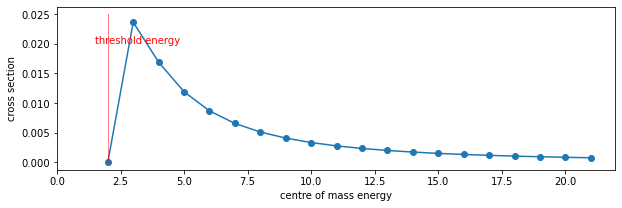

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(energies, ss, '-o')
plt.xlim(0,)
plt.plot([2, 2], [0, .025], color='r', linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("centre of mass energy")
plt.ylabel("cross section")
plt.text(1.5, .02, 'threshold energy', fontsize=10, color='r')

# 3) Bosting to the laboratory frame

<img src="boostlf.png" width="600">

We have to apply a boost for the resulting momenta to get the result in the laboratory frame, that is the frame where the electron are at rest (in a target).
To get the boost application we have to find the electrons momentum in the centre of mass frame, not a problem since we know its energy and mass.

## Deriving the Lorentz matrix $\Lambda$

We have to boost in a frame where the electron $e^-$ is at rest, this means that we have to find the velocity of the electron in the COM frame and since the velocity is negative we will find a Lorentz matrix of the following form:
$$\left(\begin{array}
           &\gamma &-v\gamma & 0 & 0 \\
          -v\gamma   & \gamma  & 0 & 0 \\
           0    &  0      & 1 & 0 \\
           0     &  0       & 0 & 1 \\ 
\end{array}\right)\Rightarrow\left(\begin{array}
           &\gamma &v\gamma & 0 & 0 \\
          v\gamma   & \gamma  & 0 & 0 \\
           0    &  0      & 1 & 0 \\
           0     &  0       & 0 & 1 \\ 
\end{array}\right)$$

Since the particle $e^-$ is moving in the direction $\hat{x}$, we can easily find the velocity using the definition of the relativistic momentum:
$$p=m_e\gamma v\to v\gamma = \frac{p}{m_e}\to \frac{v}{\sqrt{1-v^2}}=\frac{p}{m_e}\to v= \frac{p}{m_e\sqrt{1+\frac{p^2}{m_e^2}}}=\frac{p}{\sqrt{m_e^2 + p^2}}$$

Notice that the energy of the particle in the COM is $E_p=\sqrt{m_e^2+p^2}$ (the denominator)

$$\begin{cases}E_p^2=m_e^2+p^2\\ E^2_{CM}=4m_e^2+4p^2\end{cases}$$

v then becomes:

$$v=\sqrt{  \frac{E^2_{CM}-4m_e^2}{E^2_{CM}}  }$$

In [7]:
def velocity(ecm):
    me = 1
    k  = 0.05 # just for plotting purposes
    return k*math.sqrt(ecm*ecm - 4*me*me)/ecm

ecm = np.arange(2,3,0.1)
v = []
for i in range(np.size(ecm)):
    v.append(velocity(ecm[i]))
    

Text(0, 0.5, 'cross section')

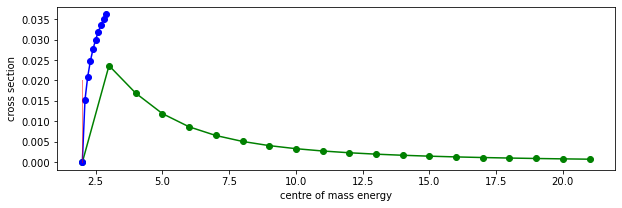

In [8]:
plt.figure(figsize=(10, 3))
plt.plot(energies, ss, '-o',color = 'g')
plt.plot(ecm, v, '-o',color='b')
plt.plot([2, 2], [0, .02], color='r', linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel("centre of mass energy")
plt.ylabel("cross section")

## The Lorentz transformation

The Lorentz matrix is then:
$$\left(\begin{array}
           &\gamma &v\gamma & 0 & 0 \\
          v\gamma   & \gamma  & 0 & 0 \\
           0    &  0      & 1 & 0 \\
           0     &  0       & 0 & 1 \\ 
\end{array}\right),\qquad\qquad v=\sqrt{  \frac{E^2_{CM}-4m_e^2}{E^2_{CM}}  }$$
Let's see how a boost work:
$$\Lambda^\mu_\nu P^\nu = P'^\mu$$
Where $P^\nu$ is the 4 momentum before the boosting (in the COM frame) and $P'^\nu$ is the 4 momentum after the boosting (in the LAB frame)

$$P^\mu=\left(\begin{array}{c}m\gamma \\ p\cos\vartheta \\ p\sin\vartheta\\ 0 \end{array}\right)$$

$m\gamma$ is the total energy of the particle $E_p$ (you can write $E_p$ either as $m\gamma$ or the formula with the squared root, that is the same)

$$P'=\left(\begin{array}
           &\gamma &v\gamma & 0 & 0 \\
          v\gamma   & \gamma  & 0 & 0 \\
           0    &  0      & 1 & 0 \\
           0     &  0       & 0 & 1 \\ 
\end{array}\right)\left(\begin{array}{c}m\gamma \\ p\cos\vartheta \\ p\sin\vartheta\\ 0 \end{array}\right)=\left(\begin{array}{c}m\gamma^2 + \gamma vp\cos\vartheta \\ m\gamma^2 v + \gamma p\cos\vartheta \\ p\sin\vartheta\\ 0 \end{array}\right)$$

You can check that $P^2=P'^2=-m^2$ since it is a scalar it is invariant under lorentz boost, it is just to check if the boost is done correctly (I already checked)

From here we can get the relationship $\vartheta\leftrightarrow\vartheta'$ the angle of the scattered particle before and after the boosts (yes it changes using special relativity!)

$$\begin{cases}
    m\gamma^2v+\gamma p\cos\vartheta = p'\cos\vartheta' \\
    p\sin\vartheta = p\sin\vartheta'
\end{cases}$$

Writing $m\gamma^2 v$ as $\gamma p$ we have

$$\begin{cases}
    \gamma p +\gamma p\cos\vartheta = p'\cos\vartheta' \\
    p\sin\vartheta = p\sin\vartheta'
\end{cases}$$

Dividing the first to the second we get:
 $$\tan\vartheta'=\frac{1}{\gamma}\left(\frac{\sin\vartheta}{1+\cos\vartheta}\right)$$
 
Here you can play with an [interactive desmos graph](https://www.desmos.com/calculator/n1ldtauxer), g is the $gamma$ factor, for $g=1$ we have no boost and the transformation $\vartheta\leftrightarrow\vartheta'$ is indeed identical